In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

In [2]:

def lagrange_interpolation(x, y, xi):
    n = len(x)
    yi = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if i != j:
                li *= (xi - x[j]) / (x[i] - x[j])
        yi += li * y[i]
    return yi

In [3]:

def interpolate_image(image_array, zoom_factor):
    height, width, channels = image_array.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    x = np.arange(width)
    y = np.arange(height)
    new_x = np.linspace(0, width - 1, new_width)
    new_y = np.linspace(0, height - 1, new_height)
    
    interpolated_array = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for c in range(channels):
        for i in range(new_height):
            for j in range(new_width):
                interpolated_array[i, j, c] = lagrange_interpolation(y, image_array[:, j, c], new_y[i])
        for i in range(new_height):
            for j in range(new_width):
                interpolated_array[i, j, c] = lagrange_interpolation(x, interpolated_array[i, :, c], new_x[j])
    
    return interpolated_array


In [4]:
# Load the image
image_path = 'car.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert image to numpy array
image_array = np.array(image)
print(f'Original image shape: {image_array.shape}')

Original image shape: (3879, 5811, 3)


In [5]:
# Interpolate to higher quality
zoom_factor = 2  # Adjust zoom factor as needed
interpolated_array = zoom(image_array, (zoom_factor, zoom_factor, 1))
print(f'Interpolated image shape: {interpolated_array.shape}')

Interpolated image shape: (7758, 11622, 3)


In [6]:
# Convert interpolated array back to image
interpolated_image = Image.fromarray(interpolated_array)

In [7]:
# Save the interpolated image
interpolated_image.save('lagrange_car.jpg')

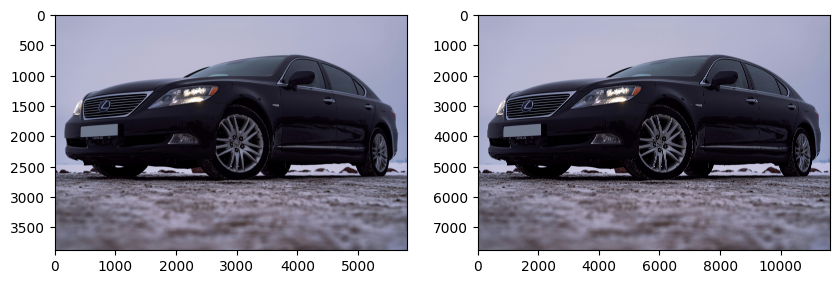

In [10]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # figsize controls the figure size

# Display the first image on the left
axes[0].imshow(image)
axes[0].axis() 

# Display the second image on the right
axes[1].imshow(interpolated_image)
axes[1].axis() 

# Show the images
plt.show()